/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


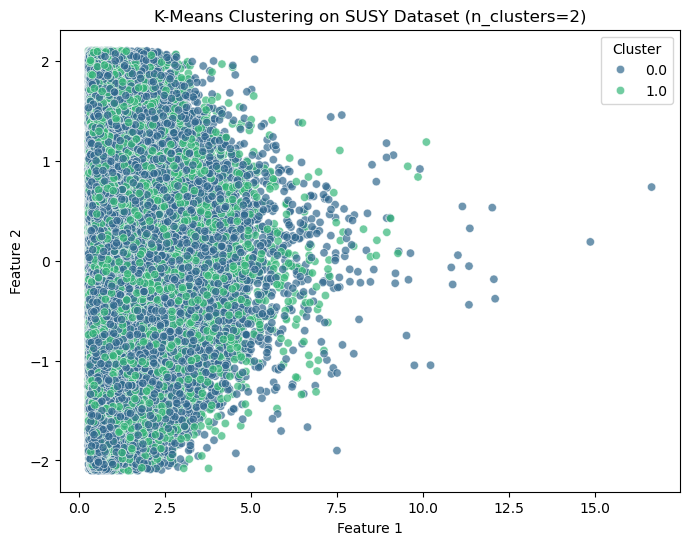

CPU times: user 20.1 s, sys: 3.78 s, total: 23.9 s
Wall time: 22.1 s


In [1]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import KMeans  # GPU-accelerated K-Means

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the SUSY datasets
susy_train = cudf.read_csv("susy_train.csv")
susy_test  = cudf.read_csv("susy_test.csv")

# Combine train and test sets
susy_data = cudf.concat([susy_train, susy_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = susy_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Apply K-Means Clustering
# ---------------------------
n_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)  # Using `features`, NOT `X`

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
sample_data["Cluster"] = cluster_labels  # Assign clusters to `sample_data`

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0].to_pandas(),  # First feature
                y=features.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering on SUSY Dataset (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()


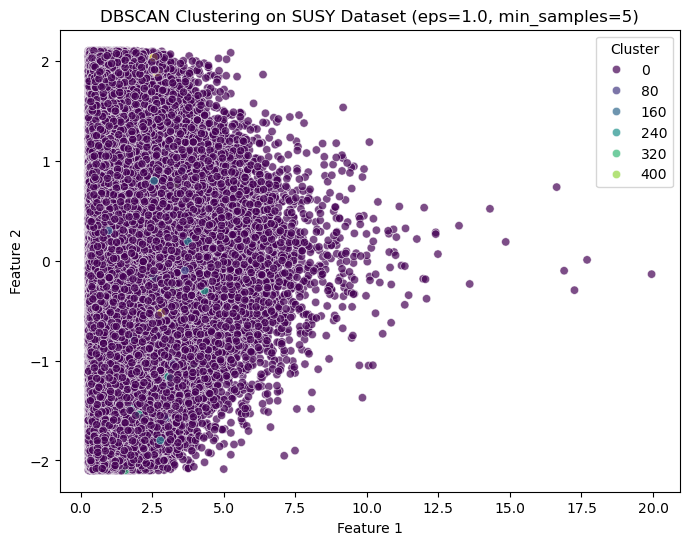

CPU times: user 1min 18s, sys: 17.1 s, total: 1min 35s
Wall time: 1min 38s


In [2]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import DBSCAN  # GPU-accelerated DBSCAN

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the SUSY datasets
susy_train = cudf.read_csv("susy_train.csv")
susy_test  = cudf.read_csv("susy_test.csv")

# Combine train and test sets
susy_data = cudf.concat([susy_train, susy_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = susy_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Apply DBSCAN Clustering
# ---------------------------
eps = 1.0  # Maximum distance between two samples to be considered neighbors
min_samples = 5  # Minimum number of points to form a dense region

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(features)  # Predict cluster labels

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
sample_data["Cluster"] = cluster_labels  # Assign clusters to `sample_data`

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0].to_pandas(),  # First feature
                y=features.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering on SUSY Dataset (eps={eps}, min_samples={min_samples})")
plt.legend(title="Cluster")
plt.show()


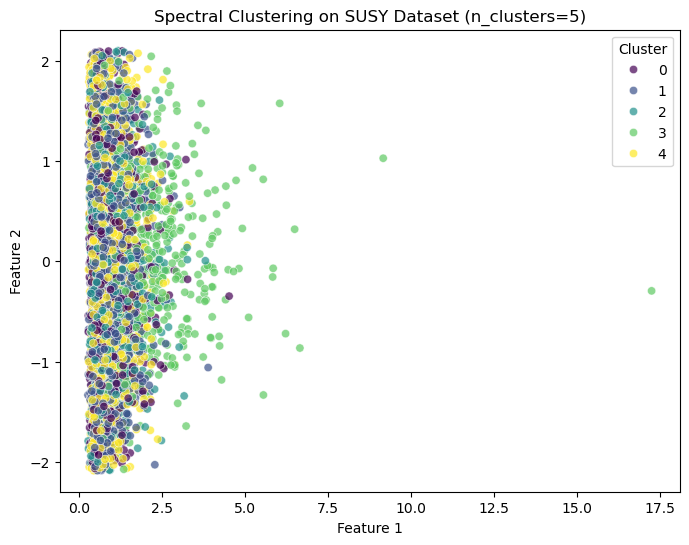

CPU times: user 12 s, sys: 626 ms, total: 12.6 s
Wall time: 12.8 s


In [3]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering  # Using scikit-learn for spectral clustering

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the SUSY datasets
susy_train = cudf.read_csv("susy_train.csv")
susy_test  = cudf.read_csv("susy_test.csv")

# Combine train and test sets
susy_data = cudf.concat([susy_train, susy_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = susy_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Subsample for Spectral Clustering
# ---------------------------
# Due to spectral clustering's computational demands, select a smaller subset (e.g., 5,000 rows)
spectral_sample = features.iloc[:5000]
# Convert to a NumPy array (SpectralClustering requires CPU arrays)
spectral_sample_np = spectral_sample.to_pandas().values

# ---------------------------
# 3. Apply Spectral Clustering
# ---------------------------
n_clusters = 5  # Set the number of clusters; adjust as needed
spectral = SpectralClustering(n_clusters=n_clusters,
                              affinity="nearest_neighbors",
                              assign_labels="discretize",
                              random_state=42)
spectral_labels = spectral.fit_predict(spectral_sample_np)

# ---------------------------
# 4. Visualize Spectral Clustering Results (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spectral_sample.iloc[:, 0].to_pandas(),  # First feature
                y=spectral_sample.iloc[:, 1].to_pandas(),  # Second feature
                hue=spectral_labels,
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Spectral Clustering on SUSY Dataset (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()
